In [1]:
import numpy as np
import pandas as pd

def read_file(subject_id):
    subject_data = {}
    with pd.HDFStore('./data/subject_{}'.format(subject_id)) as hdfs:
        subject_data.update({'Acceleration':np.array(hdfs['Acceleration'].value)})
        subject_data.update({'Acceleration_Index':np.array(hdfs['Acceleration'].index)})
        subject_data.update({'Heart_Rate':np.array(hdfs['Heart_Rate']['value'])})
        subject_data.update({'Heart_Rate_Confidence':np.array(hdfs['Heart_Rate']['conf'])})
        subject_data.update({'Heart_Rate_Index':np.array(hdfs['Heart_Rate'].index)})
        subject_data.update({'Breathing_Rate':np.array(hdfs['Breathing_Rate']['value'])})
        subject_data.update({'Breathing_Rate_Confidence':np.array(hdfs['Breathing_Rate']['conf'])})
        subject_data.update({'Breathing_Rate_Index':np.array(hdfs['Breathing_Rate'].index)})
        subject_data.update({'RR_Interval':np.array(hdfs['RR_Interval']['value'])})
        subject_data.update({'RR_Interval_Confidence':np.array(hdfs['RR_Interval']['conf'])})
        subject_data.update({'RR_Interval_Index':np.array(hdfs['RR_Interval'].index)})
        subject_data.update({'Sleep_Stages':np.array(hdfs['Sleep_Stages'].value)})
        subject_data.update({'Sleep_Stages_Index':np.array(hdfs['Sleep_Stages'].index)})
        subject_data.update({'Profile_Age':hdfs['Profile']['age'].tolist()[0]})
        subject_data.update({'Profile_Gender':hdfs['Profile']['gender'].tolist()[0]})
        subject_data.update({'Profile_Weight':hdfs['Profile']['weight'].tolist()[0]})
        subject_data.update({'Profile_Height':hdfs['Profile']['height'].tolist()[0]})
        subject_data.update({'Profile_Blood_Pressure_Systolic':hdfs['Profile']['blood_pressure_systolic'].tolist()[0]})
        subject_data.update({'Profile_Blood_Pressure_Diastolic':hdfs['Profile']['blood_pressure_diastolic'].tolist()[0]})
        subject_data.update({'Profile_Cholesterol':hdfs['Profile']['cholesterol'].tolist()[0]})
        subject_data.update({'Profile_Smoker':hdfs['Profile']['smoker'].tolist()[0]})
        
    return(subject_data)

In [2]:
all_subject_data = {}
for i in range(10):
    all_subject_data.update({'subject{}'.format(i):read_file(i)})

In [3]:
import pylab as plt
subject_data = all_subject_data['subject0']

In [4]:
print "Age: " + str(subject_data['Profile_Age'])
print "Gender : " + str(subject_data['Profile_Gender'])
print "Weight : " + str(subject_data['Profile_Weight'])
print "Height : " + str(subject_data['Profile_Height'])
print "Cholesterol : " + str(subject_data['Profile_Cholesterol'])
print "Blood Pressure Systolic : " + str(subject_data['Profile_Blood_Pressure_Systolic'])
print "Blood Pressure Diastolic : " + str(subject_data['Profile_Blood_Pressure_Diastolic'])
print "Smoker : " + str(subject_data['Profile_Smoker'])

Age: 42
Gender : Female
Weight : 66.0
Height : 167.0
Cholesterol : 2.7
Blood Pressure Systolic : 120
Blood Pressure Diastolic : 78
Smoker : Yes


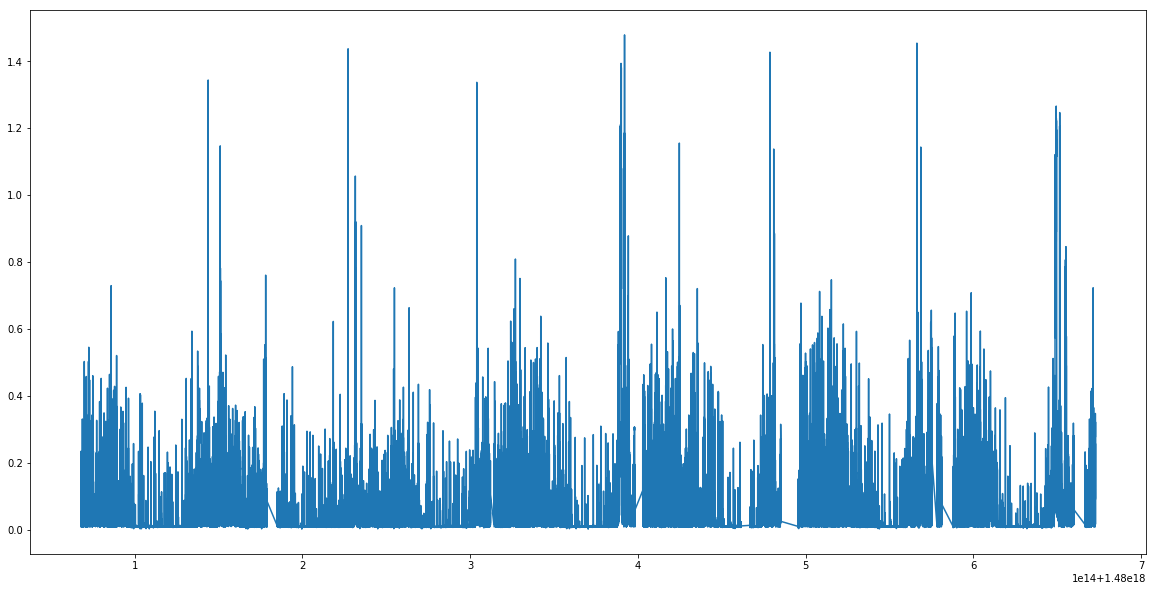

In [5]:
plt.figure(figsize=(20,10))
plt.plot(subject_data['Acceleration_Index'], subject_data['Acceleration'])
plt.show()

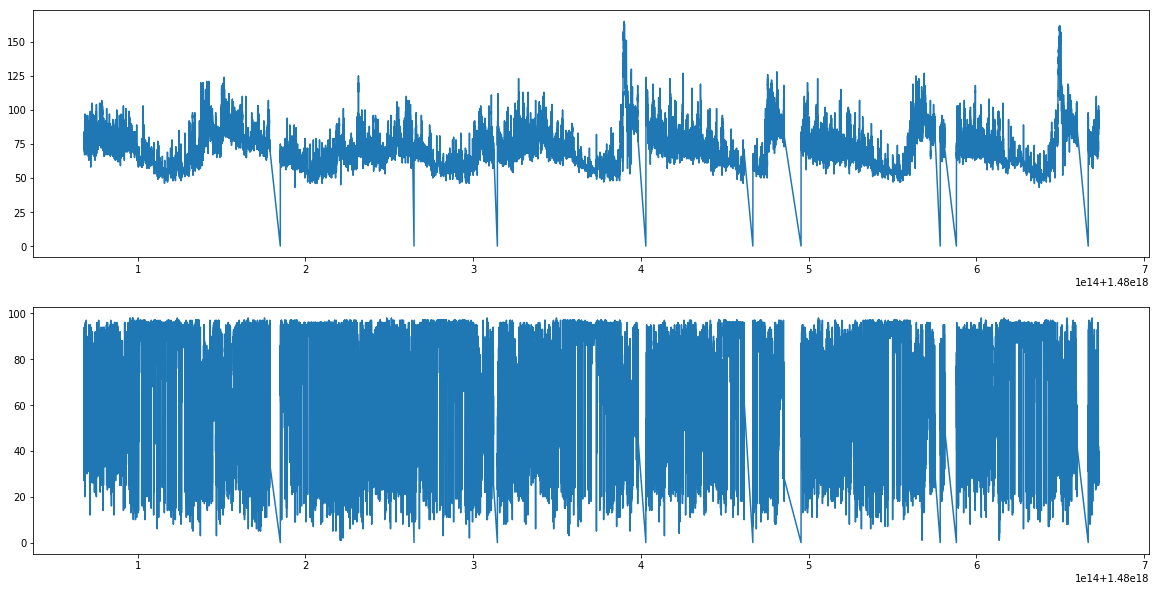

In [6]:
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(subject_data['Heart_Rate_Index'], subject_data['Heart_Rate'])
plt.subplot(212)
plt.plot(subject_data['Heart_Rate_Index'], subject_data['Heart_Rate_Confidence'])
plt.show()

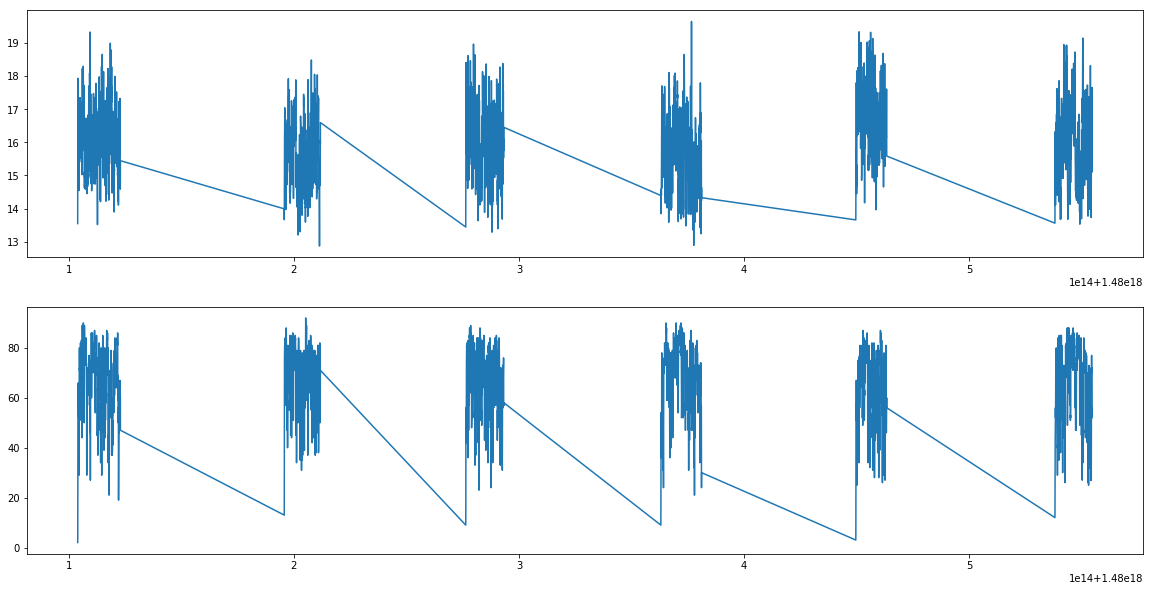

In [7]:
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(subject_data['Breathing_Rate_Index'], subject_data['Breathing_Rate'])
plt.subplot(212)
plt.plot(subject_data['Breathing_Rate_Index'], subject_data['Breathing_Rate_Confidence'])
plt.show()

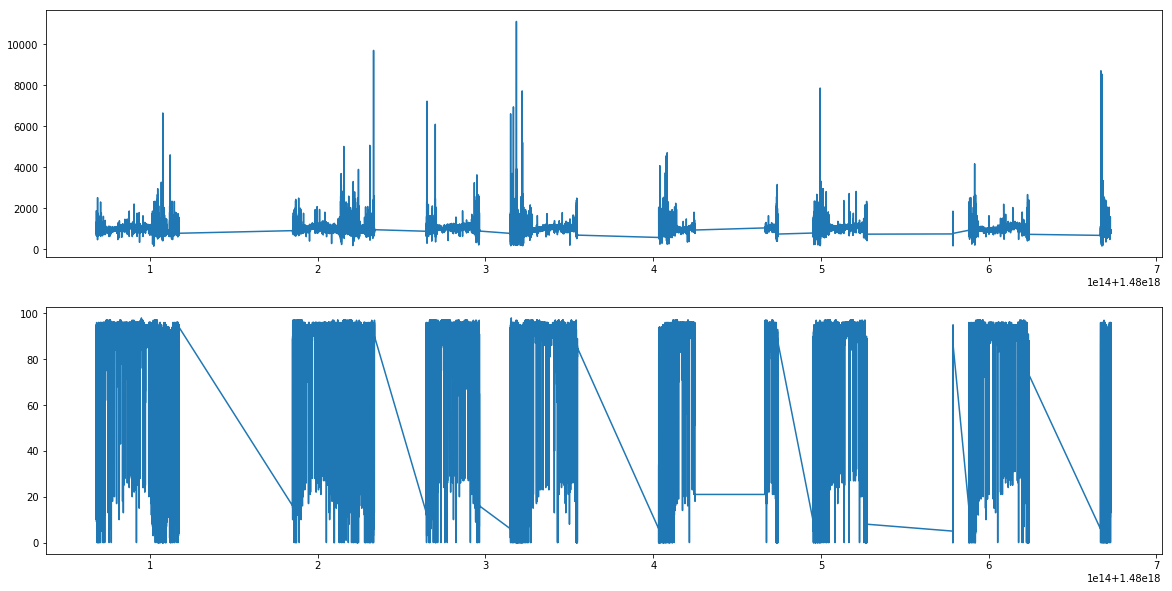

In [8]:
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(subject_data['RR_Interval_Index'], subject_data['RR_Interval'])
plt.subplot(212)
plt.plot(subject_data['RR_Interval_Index'], subject_data['RR_Interval_Confidence'])
plt.show()

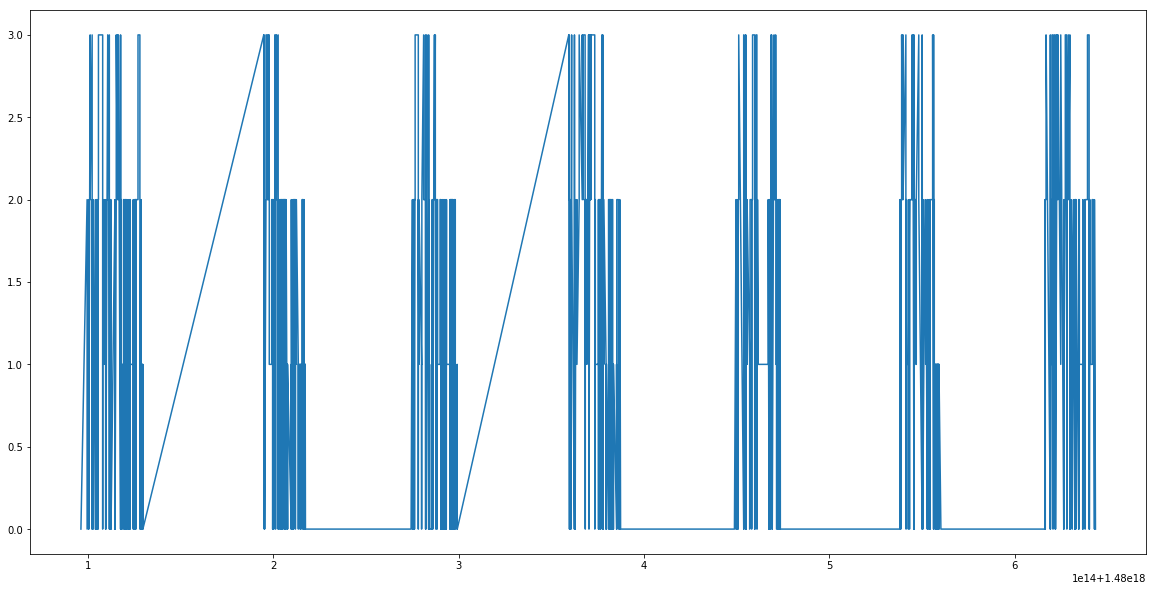

In [9]:
tmp_sleep_stages = subject_data['Sleep_Stages']
tmp_sleep_stages[tmp_sleep_stages == 'sleep_wake_start'] = 0
tmp_sleep_stages[tmp_sleep_stages == 'sleep_wake_stop'] = 0
tmp_sleep_stages[tmp_sleep_stages == 'sleep_rem_start'] = 1
tmp_sleep_stages[tmp_sleep_stages == 'sleep_rem_stop'] = 1
tmp_sleep_stages[tmp_sleep_stages == 'sleep_light_start'] = 2
tmp_sleep_stages[tmp_sleep_stages == 'sleep_light_stop'] = 2
tmp_sleep_stages[tmp_sleep_stages == 'sleep_deep_start'] = 3
tmp_sleep_stages[tmp_sleep_stages == 'sleep_deep_stop'] = 3
plt.figure(figsize=(20,10))
plt.plot(subject_data['Sleep_Stages_Index'], tmp_sleep_stages)
plt.show()